In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:

df = pd.read_csv("battery_capacity_history.csv", sep="\t")
# df.head()

In [9]:


df.columns = [
    "period",
    "full_charge_capacity",
    "design_capacity"
]

df[["start_date", "end_date"]] = df["period"].str.split(" - ", expand=True)
df.drop(columns=["period"], inplace=True)

for col in ["full_charge_capacity", "design_capacity"]:
    df[col] = (
        df[col]
        .str.replace(",", "", regex=False)
        .str.replace("mWh", "", regex=False)
        .str.replace(" ", "", regex=False)
        .astype(int)
    )
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])
df = df.drop(columns=["end_date"])
df = df.rename(columns={"start_date": "date"})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   full_charge_capacity  193 non-null    int64         
 1   design_capacity       193 non-null    int64         
 2   date                  193 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.7 KB


In [10]:
df.head()


,full_charge_capacity,design_capacity,date
0,90072,90005,2021-10-31
1,89363,90005,2021-11-07
2,89624,90005,2021-11-14
3,89566,90005,2021-11-21
4,90174,90005,2021-11-28


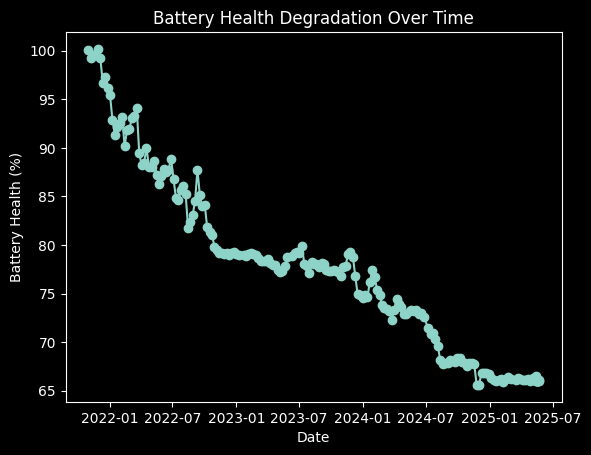

In [11]:
df["health_pct"] = df["full_charge_capacity"] / df["design_capacity"] * 100
plt.figure()
plt.plot(df["date"], df["health_pct"] , marker="o", label=["Battery Health"])

plt.xlabel("Date")
plt.ylabel("Battery Health (%)")
plt.title("Battery Health Degradation Over Time")
plt.show()


In [12]:
import statsmodels.api as sm

#X = time(numeric)
X = (df["date"] - df["date"].min()).dt.days
X = sm.add_constant(X)

#y = battery health
y = df["health_pct"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             health_pct   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2331.
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          5.56e-109
Time:                        12:06:09   Log-Likelihood:                -450.59
No. Observations:                 193   AIC:                             905.2
Df Residuals:                     191   BIC:                             911.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.5513      0.360    256.936      0.0